{
  "node_id": "11152f09-0043-493b-bfa4-066f22493aee",
  "dtype": "torch.float16",
  "name": "result",
  "shape": [
    20,
    30,
    4
  ]
}


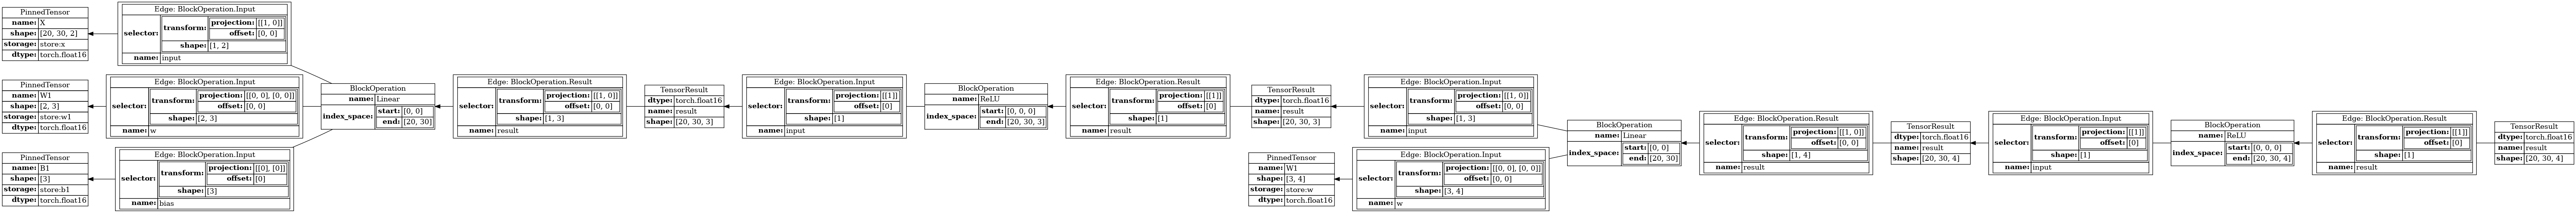

In [1]:
from dataclasses import dataclass

import marshmallow_dataclass

from tapestry.jupyter_utils import display_graph
from tapestry.raw_edge import raw
from tapestry.serialization.json_serializable import JsonLoadable

display_graph(raw())

In [ ]:
import torch
from dataclasses import dataclass
import marshmallow_dataclass
from tapestry.serialization.json_serializable import JsonLoadable


@marshmallow_dataclass.add_schema
@dataclass
class Example(JsonLoadable):
    name: str
    dtype: torch.dtype


x = Example("abc", torch.float32)
display(x)
print(x.pretty())